# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [4]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [5]:
# Example importing the CSV here
url='https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'
df=pd.read_csv(url)
df.shape

(48895, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']

print("Numerical variables:", num_vars)
print("Categorical variables:", cat_vars)


Numerical variables: Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')
Categorical variables: Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')


In [16]:
df[num_vars].isnull().sum().sort_values(ascending=False)/len(df)

reviews_per_month                 0.205583
id                                0.000000
host_id                           0.000000
latitude                          0.000000
longitude                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [17]:
df[cat_vars].isnull().sum().sort_values(ascending=False)/len(df)

last_review            0.205583
host_name              0.000429
name                   0.000327
neighbourhood_group    0.000000
neighbourhood          0.000000
room_type              0.000000
dtype: float64

The data frame has 16 variables and there are three variables types: int64, object and float64.
Four of variables have missing values (one numerical and three categorical).  For two variables the missing values represent about 20% of the total vaues (last_review and reviews_per_month). For hot_name and name, the missing values are not significant. 

In [25]:
df.sample(30)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
39653,30860048,comfortable room with cheap fee,230720666,Xiao,Manhattan,Financial District,40.70612,-74.01585,Private room,80,3,0,NaN,NaN,1,133
13971,10609249,Magnificent New 2 BR near park Ave,1515120,Dino,Manhattan,Midtown,40.75500,-73.96562,Private room,325,3,9,2016-12-28,0.23,1,88
19744,15807946,Cute and comfortable niece room with a balcony.,84141567,Alida,Queens,Maspeth,40.73529,-73.90219,Private room,65,4,0,NaN,NaN,3,0
31790,24799677,1 Bedroom available in a four bedroom house,25109819,Stefanos,Queens,Astoria,40.75989,-73.91571,Private room,40,1,5,2018-05-30,0.35,1,0
8363,6428482,2C Private Rm in Guesthouse Manhattan,7831209,Bobi,Manhattan,East Harlem,40.80749,-73.93803,Private room,50,1,103,2019-05-31,2.07,10,365
22111,17790958,Room in SOHO! On Broome Street,49651890,Rosemarie,Manhattan,Nolita,40.72196,-73.99664,Private room,120,6,47,2019-07-03,2.54,1,40
3314,1979848,1 BR in a luxury apt bldg,10217559,Mary Elizabeth,Brooklyn,Park Slope,40.67122,-73.98618,Entire home/apt,175,1,0,NaN,NaN,1,0
43428,33652038,"Brooklyn room close to the train, L,C,A,Zand J",230037325,Jay,Brooklyn,Cypress Hills,40.67916,-73.90628,Private room,57,1,9,2019-06-23,3.18,6,170
48695,36387905,Manhattan Apartment Private Close to Subway,273613106,Jose L.,Manhattan,East Harlem,40.79031,-73.94269,Entire home/apt,139,1,0,NaN,NaN,1,354
46458,35261660,"Crown Heights 3BR, 2 BATH (15 mins to Manhattan!)",265463203,Alesh,Brooklyn,Crown Heights,40.67038,-73.92962,Entire home/apt,245,2,1,2019-07-01,1.00,3,326


Change some variables types to the corrects one:

In [26]:
df=df.astype({'name':'str','host_name':'str','neighbourhood_group':'category','neighbourhood':'category','room_type':'category'})
df['last_review'] = pd.to_datetime(df['last_review'], format="%Y/%m/%d")
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                     category
neighbourhood                           category
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

some statitical information:

In [27]:
round(df.describe())

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,38843.0,48895.0,48895.0
mean,19017143.0,67620011.0,41.0,-74.0,153.0,7.0,23.0,1.0,7.0,113.0
std,10983108.0,78610967.0,0.0,0.0,240.0,21.0,45.0,2.0,33.0,132.0
min,2539.0,2438.0,40.0,-74.0,0.0,1.0,0.0,0.0,1.0,0.0
25%,9471945.0,7822033.0,41.0,-74.0,69.0,1.0,1.0,0.0,1.0,0.0
50%,19677284.0,30793816.0,41.0,-74.0,106.0,3.0,5.0,1.0,1.0,45.0
75%,29152178.0,107434423.0,41.0,-74.0,175.0,5.0,24.0,2.0,2.0,227.0
max,36487245.0,274321313.0,41.0,-74.0,10000.0,1250.0,629.0,58.0,327.0,365.0


Variable analysis:

the latitude and logitude are ok because it seems to be from the same city.

price: it seems that there are outliers, because the maximum value is 10000 and the 3th quartile is 175.

minimum_nights: same happens in this variable, the maximum value does not seems to be possible (1250) given than the 3th quartile is 5.

for the number of reviews and reviews per month, there are some extreme values, much bigger than the 3th quantile.

calculated host listing count: I interpreted that this variable as the number of properties that has the same host.

availability 365: it seems that AIRBNB is not the right platform to rent a room/property for a full year, but is it possible. So I keep all the values.

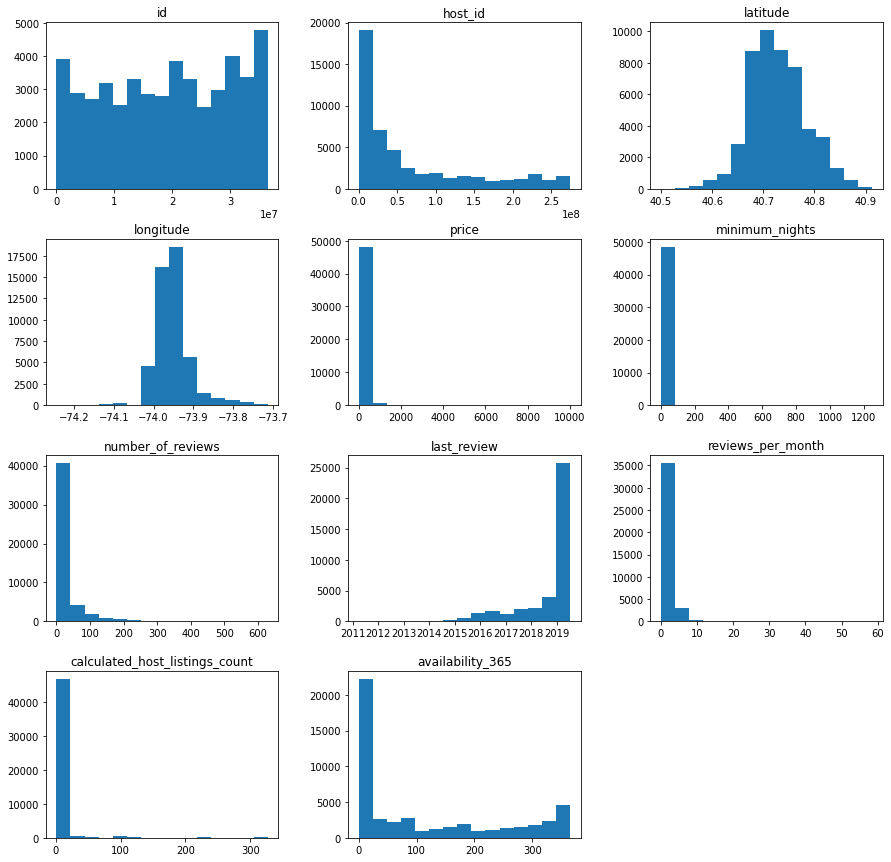

In [28]:
df.hist(bins=15,figsize=(15,15),grid=False);

Countplot for categorical variables

In [29]:
df.groupby('neighbourhood_group').size().reset_index(name='Number or properties').sort_values(by='Number or properties', ascending=False).assign(Percentage_total=lambda x: round(x['Number or properties']/sum(x['Number or properties'])*100,2))

,neighbourhood_group,Number or properties,Percentage_total
2,Manhattan,21661,44.30
1,Brooklyn,20104,41.12
3,Queens,5666,11.59
0,Bronx,1091,2.23
4,Staten Island,373,0.76


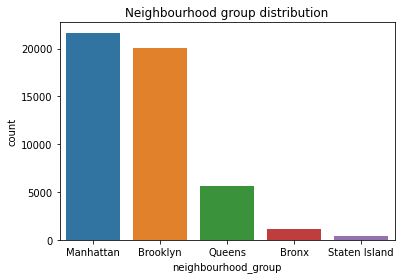

In [30]:
plot=sns.countplot(x='neighbourhood_group',data=df,order = df['neighbourhood_group'].value_counts().index).set(title='Neighbourhood group distribution')
plt.show()


The neighbourhood group with more properties is Manhattan, represent 44.3% of all properties. Is followed by Brooklyn with 41.1% of total.

In [31]:
df['neighbourhood'].unique()

['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem', ..., 'Bull's Head', 'New Dorp', 'Rossville', 'Breezy Point', 'Willowbrook']
Length: 221
Categories (221, object): ['Allerton', 'Arden Heights', 'Arrochar', 'Arverne', ..., 'Woodhaven', 'Woodlawn', 'Woodrow', 'Woodside']

There are 221 differentes neighbourhoods.

In [32]:
table=df.groupby(['neighbourhood', 'neighbourhood_group']).size().reset_index(name='Number or properties').sort_values(by=['Number or properties'], ascending=False).assign(Percentage_total=lambda x: round(x['Number or properties']/sum(x['Number or properties'])*100,2))
table.head(15)

,neighbourhood,neighbourhood_group,Number or properties,Percentage_total
1071,Williamsburg,Brooklyn,3920,8.02
66,Bedford-Stuyvesant,Brooklyn,3714,7.60
472,Harlem,Manhattan,2658,5.44
141,Bushwick,Brooklyn,2465,5.04
1012,Upper West Side,Manhattan,1971,4.03
477,Hell's Kitchen,Manhattan,1958,4.00
322,East Village,Manhattan,1853,3.79
1007,Upper East Side,Manhattan,1798,3.68
256,Crown Heights,Brooklyn,1564,3.20
637,Midtown,Manhattan,1545,3.16


Altought the neighbourdhood group with more properties is Manhattan, the  neighbourhood with more properties is not located there (is in Brooklyn), this neighbourhood represents 8.02% of all properties.

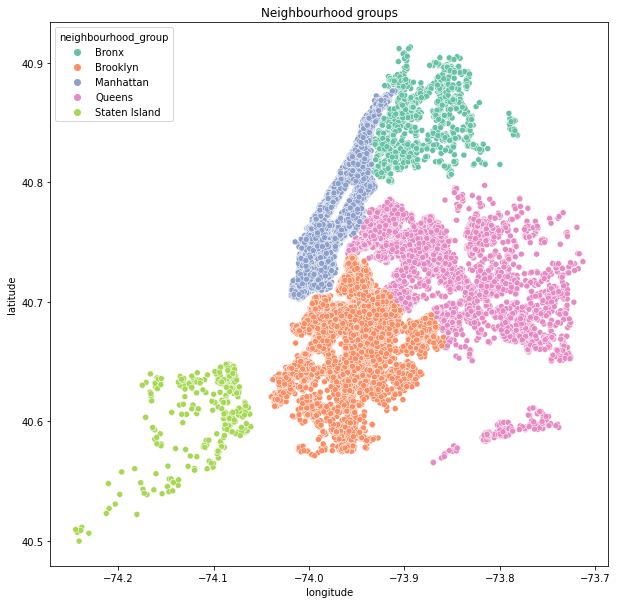

In [33]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['neighbourhood_group'], palette='Set2')
plt.title('Neighbourhood groups')
plt.show()

In [47]:
my_list=table['neighbourhood'].head(10).to_list()

for i in my_list:
    df_filter=[df['neighbourhood']==i]
df_filter

[0        False
 1         True
 2        False
 3        False
 4        False
          ...  
 48890    False
 48891    False
 48892    False
 48893    False
 48894    False
 Name: neighbourhood, Length: 48895, dtype: bool]

In [48]:
df.groupby('room_type').size().reset_index(name='Number or properties').sort_values(by='Number or properties', ascending=False).assign(Percentage_total=lambda x: round(x['Number or properties']/sum(x['Number or properties'])*100,2))

,room_type,Number or properties,Percentage_total
0,Entire home/apt,25409,51.97
1,Private room,22326,45.66
2,Shared room,1160,2.37


Regarding the type of room, 52% are the entire home/apt, then is private room with 46% and last the shared room with the remaing 2%.

I want to test some assumptions: shared room is cheaper than the other types.
What is the relation between neig group/ neig and price
chequear nulos y na--quizas esto deba de hacerlo antes q nada, conviene realizar algun tipo de imputación?
El tema de si algun id esta repetido o no y toda esa discusión. 
Fijarme si queda alguna variable sin analizar, falta la de 365Ñ que se podría decir
box plot para el precio

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']


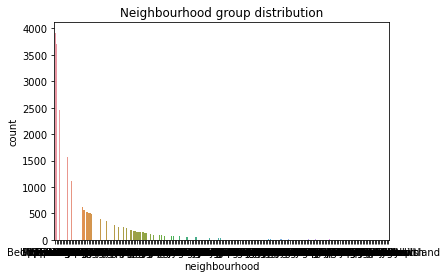

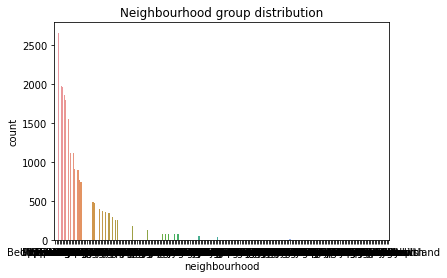

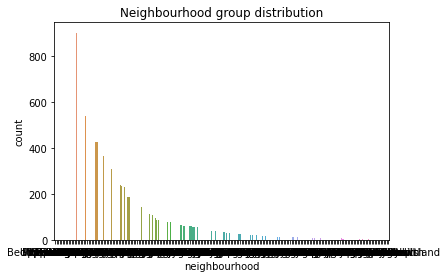

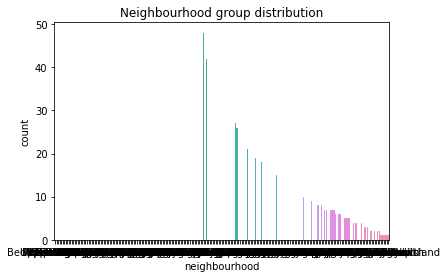

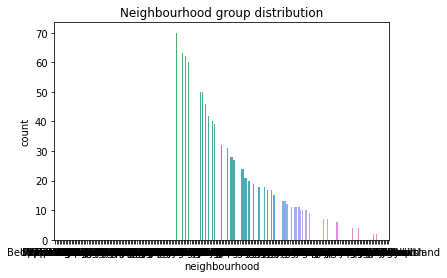

In [35]:
my_list=list(df['neighbourhood_group'].unique())
print(my_list)
for i in my_list:
    plot=sns.countplot(x='neighbourhood',data=df[df['neighbourhood_group']==i],order = df['neighbourhood'].value_counts().index).set(title='Neighbourhood group distribution')
    plt.show()
    

In [36]:
print('Number of different hosts:', df['host_id'].nunique())

Number of different hosts: 37457


In [37]:
print('Total rooms offered in the database: ', df['room_type'].value_counts().sum())
print('Different types of rooms:')
df['room_type'].value_counts()


Total rooms offered in the database:  48895
Different types of rooms:


Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In the Dataframe there are 48895 offered rooms and only 37457 host --> there are some hosts with more than one property.
Also the most offered room type is th entire home/apt.

In [38]:
df.groupby('host_id')[['number_of_reviews','id']].agg({'id':pd.Series.nunique,'number_of_reviews':['sum','mean']}).sort_values(by=('id','nunique'),ascending=False)[0:10] # Top 10 host

id number_of_reviews          
          nunique               sum      mean
host_id                                      
219517861     327              1281  3.917431
107434423     232                29  0.125000
30283594      121                65  0.537190
137358866     103                87  0.844660
16098958       96               138  1.437500
12243051       96                43  0.447917
61391963       91               417  4.582418
22541573       87                55  0.632184
200380610      65                 1  0.015385
1475015        52               162  3.115385

In [39]:
df_hn=round(df.groupby(['host_id','neighbourhood_group'])[['number_of_reviews','id','price']].agg({'id':pd.Series.nunique,'number_of_reviews':['sum','mean'],'price':'mean'}).sort_values(by=('id','nunique'),ascending=False))[0:10] # Top 10 host
df_hn

id number_of_reviews       price
                              nunique               sum mean   mean
host_id   neighbourhood_group                                      
219517861 Manhattan             327.0              1281  4.0  253.0
107434423 Manhattan             230.0                29  0.0  303.0
30283594  Manhattan             121.0                65  1.0  278.0
12243051  Manhattan              96.0                43  0.0  213.0
16098958  Manhattan              96.0               138  1.0  209.0
61391963  Manhattan              91.0               417  5.0  146.0
22541573  Manhattan              86.0                54  1.0  216.0
137358866 Queens                 79.0                54  1.0   44.0
200380610 Manhattan              65.0                 1  0.0  290.0
1475015   Manhattan              52.0               162  3.0  103.0

In [40]:
df_hn_filt=df[df['host_id'].isin(list(df_hn.reset_index()['host_id']))]
df_hn_filt

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1386,613556,"2 BED TriBeCa, Beautiful-Renovated!",1475015,Mike,Manhattan,Tribeca,40.71655,-74.01171,Entire home/apt,130,30,2,2015-10-31,0.03,52,116
1454,652371,ELEGANT MIDTOWN EAST STUDIO E.52 ST,1475015,Mike,Manhattan,Midtown,40.75743,-73.96939,Entire home/apt,90,30,3,2016-12-31,0.05,52,358
1455,652466,32nd St & Lexington Ave / Doorman Beautiful St...,1475015,Mike,Manhattan,Kips Bay,40.74190,-73.98160,Entire home/apt,100,30,2,2018-06-30,0.04,52,342
1456,652515,COLUMBUS CIRCLE~FULLY FURNISHED!!!,1475015,Mike,Manhattan,Hell's Kitchen,40.76758,-73.98722,Entire home/apt,85,30,2,2016-08-15,0.04,52,223
1457,652648,GRAMERCY PARK~FURNISHED E.20's ST P,1475015,Mike,Manhattan,Kips Bay,40.74189,-73.97833,Entire home/apt,87,30,3,2018-08-15,0.05,52,363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48723,36404684,Smart Nolita 1BR w/ W/D near famous cafes by B...,107434423,Blueground,Manhattan,Nolita,40.72283,-73.99472,Entire home/apt,316,30,0,NaT,NaN,232,325
48724,36404784,Dapper Hell's Kitchen 2BR w/ Gym + W/D + Door...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76082,-73.99709,Entire home/apt,385,30,0,NaT,NaN,232,338
48725,36404815,Trendy Hell's Kitchen 1BR w/ Gym + W/D + Doorm...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76083,-73.99727,Entire home/apt,267,30,0,NaT,NaN,232,228
48726,36404936,Beautiful Williamsburg 2BR w/ Skyline views + ...,107434423,Blueground,Brooklyn,Williamsburg,40.71493,-73.96365,Entire home/apt,278,30,0,NaT,NaN,232,188


In [41]:
pd.set_option('display.max_rows',110)
round(df_hn_filt.groupby(['host_id','neighbourhood_group','neighbourhood'])[['number_of_reviews','id','price']].agg({'id':pd.Series.nunique,'number_of_reviews':['sum','mean'],'price':'mean'}).sort_values(by=['host_id',('id','nunique')],ascending=False).dropna()) # Top 10 host

id number_of_reviews  \
                                                 nunique               sum   
host_id   neighbourhood_group neighbourhood                                  
219517861 Manhattan           Financial District   218.0              1129   
                              Murray Hill           50.0               141   
                              Theater District      27.0                 6   
                              Hell's Kitchen        15.0                 3   
                              Chelsea                7.0                 0   
                              Upper East Side        6.0                 2   
                              Midtown                4.0                 0   
200380610 Manhattan           Midtown               17.0                 0   
                              Upper East Side       10.0                 0   
                              Hell's Kitchen         9.0                 0   
                              Upper West Side        6.0                 0   
                              Chelsea                5.0                 1   
                              Murray Hill            5.0                 0   
                              Theater District       4.0                 0   
                              East Village           2.0                 0   
                              Gramercy               2.0                 0   
                              Kips Bay               2.0                 0   
                              West Village           2.0                 0   
                              Battery Park City      1.0                 0   
137358866 Queens              Woodside              35.0                22   
                              Sunnyside             17.0                14   
          Manhattan           Harlem                12.0                18   
          Queens              Elmhurst              10.0                11   
                              Astoria                9.0                 2   
          Brooklyn            Bushwick               6.0                 6   
          Manhattan           East Harlem            6.0                 9   
          Queens              Jackson Heights        4.0                 3   
                              Maspeth                3.0                 2   
                              Long Island City       1.0                 0   
107434423 Manhattan           Chelsea               37.0                 7   
                              Tribeca               30.0                 3   
                              Theater District      27.0                 2   
                              Financial District    25.0                 4   
                              Upper West Side       17.0                 2   
                              East Village          14.0                 1   
                              Kips Bay              14.0                 1   
                              West Village          14.0                 1   
                              Midtown               13.0                 1   
                              Hell's Kitchen        10.0                 1   
                              Upper East Side       10.0                 3   
                              Murray Hill            9.0                 2   
                              Battery Park City      2.0                 1   
                              Flatiron District      2.0                 0   
                              Nolita                 2.0                 0   
          Brooklyn            DUMBO                  1.0                 0   
                              Williamsburg           1.0                 0   
          Manhattan           Gramercy               1.0                 0   
                              Lower East Side        1.0                 0   
                              NoHo                   1.0                 0  

In [42]:
df_nei=df.groupby(['neighbourhood_group','neighbourhood']).agg({'price':'mean'}).sort_values(by=['neighbourhood_group','price'],ascending=False).dropna()

In [43]:
df_nei.reset_index(inplace=True)

In [44]:
list(df_nei.neighbourhood_group.unique())

['Staten Island', 'Queens', 'Manhattan', 'Brooklyn', 'Bronx']

In [45]:
for barrio in list(df_nei.neighbourhood_group.unique()) :
    display(df_nei[df_nei['neighbourhood_group'] == barrio].head(5))

,neighbourhood_group,neighbourhood,price
0,Staten Island,Fort Wadsworth,800.0
1,Staten Island,Woodrow,700.0
2,Staten Island,Prince's Bay,409.5
3,Staten Island,Randall Manor,336.0
4,Staten Island,Willowbrook,249.0


,neighbourhood_group,neighbourhood,price
43,Queens,Neponsit,274.666667
44,Queens,Breezy Point,213.333333
45,Queens,Jamaica Estates,182.947368
46,Queens,Arverne,171.779221
47,Queens,Belle Harbor,171.500000


,neighbourhood_group,neighbourhood,price
94,Manhattan,Tribeca,490.638418
95,Manhattan,Battery Park City,367.557143
96,Manhattan,Flatiron District,341.925000
97,Manhattan,NoHo,295.717949
98,Manhattan,SoHo,287.103352


,neighbourhood_group,neighbourhood,price
126,Brooklyn,Sea Gate,487.857143
127,Brooklyn,Cobble Hill,211.929293
128,Brooklyn,Brooklyn Heights,209.064935
129,Brooklyn,DUMBO,196.305556
130,Brooklyn,Vinegar Hill,187.176471


,neighbourhood_group,neighbourhood,price
173,Bronx,Riverdale,442.090909
174,Bronx,City Island,173.000000
175,Bronx,Spuyten Duyvil,154.750000
176,Bronx,Eastchester,141.692308
177,Bronx,Unionport,137.142857


In [46]:
for barrio in list(df_nei.neighbourhood_group.unique()) :
    display(df_nei[df_nei['neighbourhood_group'] == barrio].tail(5))

,neighbourhood_group,neighbourhood,price
38,Staten Island,Concord,58.192308
39,Staten Island,Grant City,57.666667
40,Staten Island,New Dorp Beach,57.400000
41,Staten Island,New Dorp,57.000000
42,Staten Island,Bull's Head,47.333333


,neighbourhood_group,neighbourhood,price
89,Queens,Ridgewood,77.184397
90,Queens,Rosedale,76.694915
91,Queens,Little Neck,75.200000
92,Queens,Woodhaven,67.170455
93,Queens,Corona,59.171875


,neighbourhood_group,neighbourhood,price
121,Manhattan,Morningside Heights,114.783237
122,Manhattan,Roosevelt Island,113.259740
123,Manhattan,Washington Heights,89.610679
124,Manhattan,Marble Hill,89.166667
125,Manhattan,Inwood,88.896825


,neighbourhood_group,neighbourhood,price
168,Brooklyn,Midwood,80.339450
169,Brooklyn,Gravesend,79.014706
170,Brooklyn,Brownsville,76.459016
171,Brooklyn,Bensonhurst,75.786667
172,Brooklyn,Borough Park,63.066176


,neighbourhood_group,neighbourhood,price
216,Bronx,Mount Eden,58.500000
217,Bronx,Bronxdale,57.105263
218,Bronx,Soundview,53.466667
219,Bronx,Tremont,51.545455
220,Bronx,Hunts Point,50.500000
